In [1]:
import xarray as xr
from pathlib import Path

output_path = Path("/gws/pw/j05/cop26_hackathons/bristol/project10/percentile_diff_outputs/")
filename = output_path / "UTCI_climatology_p95_difference_1985-2015_2071-2101.nc"

dataset = xr.open_dataset(filename) # Open processed netcdf file
data = dataset["utci"] # Select utci variable from the dataset file

In [2]:
scenario_date_range = ["2071", "2101"]
ref_date_range = ["1985", "2015"]

In [3]:
average_overall = data.mean(dim=["model","scenario"])

C:\Users\rt17603\OneDrive - University of Bristol\Documents\Courses\2021-06 CMIP6 Hackathon\project10\global_comparison\plot_map.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


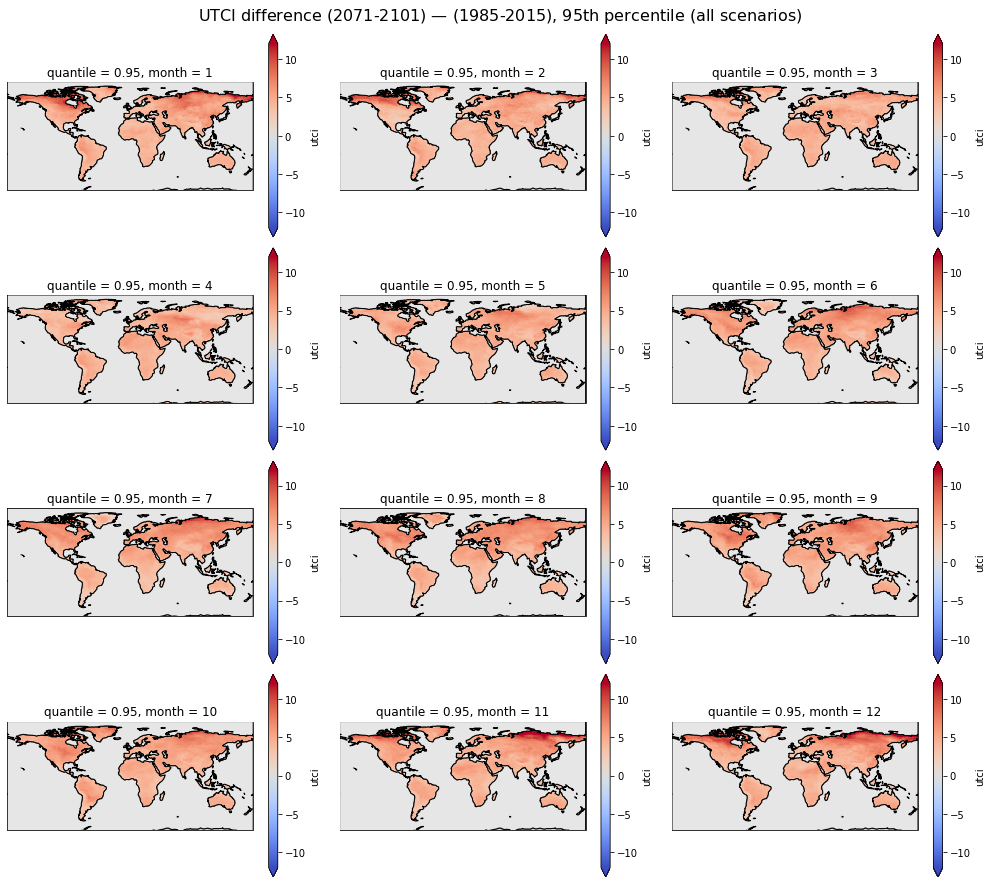

In [4]:
from plot_map import plot_diff_maps_monthly
import numpy as np

# Grabbing plotting code from plot_map.py file (if not working, can just copy the function into this notebook instead)

title = f"UTCI difference ({scenario_date_range[0]}-{scenario_date_range[1]}) $\emdash$ ({ref_date_range[0]}-{ref_date_range[1]}), 95th percentile (all scenarios)"

# Plotting average, uses diverging colourmap overall (coolwarm) which needs vmin < 0 and vmax > 0
plot_diff_maps_monthly(average_overall, title=title, vmin=-12, vmax=12)

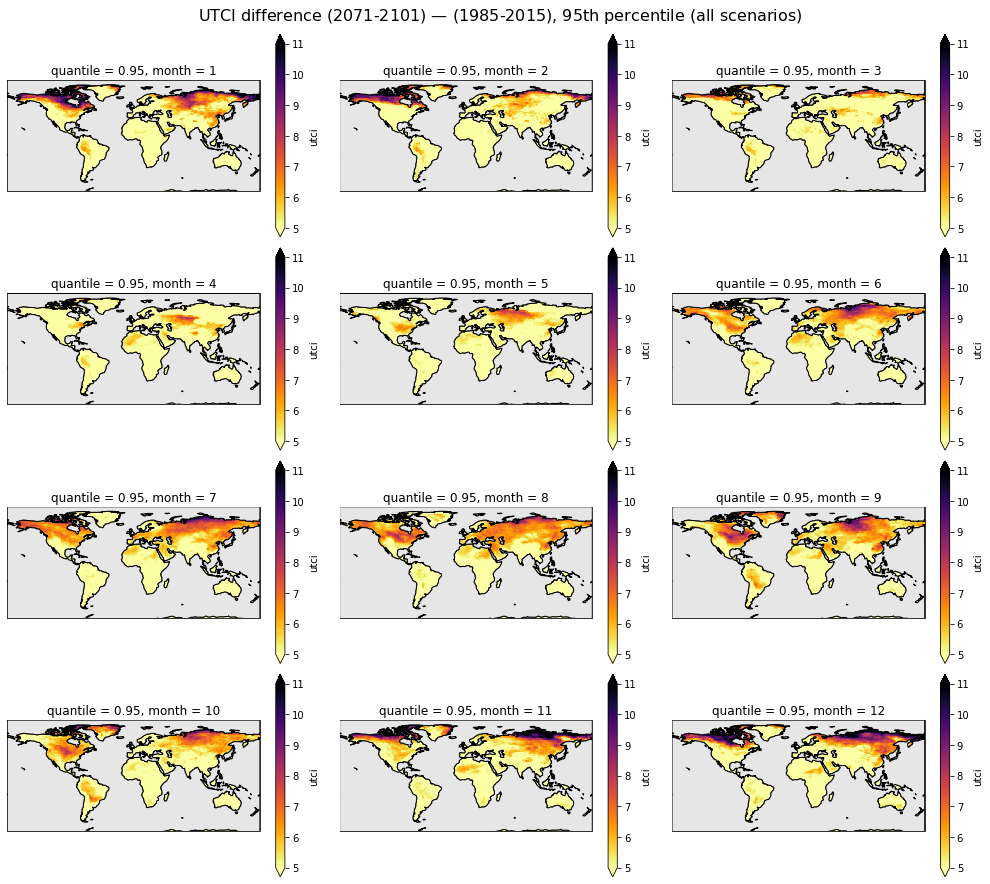

In [5]:
title = f"UTCI difference ({scenario_date_range[0]}-{scenario_date_range[1]}) $\emdash$ ({ref_date_range[0]}-{ref_date_range[1]}), 95th percentile (all scenarios)"

outputname = output_path / "UTCI_climatology_p95_difference_1985-2015_2071-2101_average_all.png"

# Can plot with non-divering colourmap instead (inferno_r) with vmax and vmin > 0
plot_diff_maps_monthly(average_overall, title=title, vmin=5, vmax=11, cmap_diverging=False, outputname=outputname)

In [6]:
print("Models", data.model.values)
print("Scenarios", data.scenario.values)

Models ['BCC-CSM2-MR' 'HadGEM3-GC31-LL']
Scenarios ['ssp126' 'ssp245' 'ssp585']


In [7]:
# Selecting model and scenario
hadgem_ssp585 = data.sel(model="HadGEM3-GC31-LL", scenario="ssp585")
bcc_ssp585 = data.sel(model="BCC-CSM2-MR", scenario="ssp585")

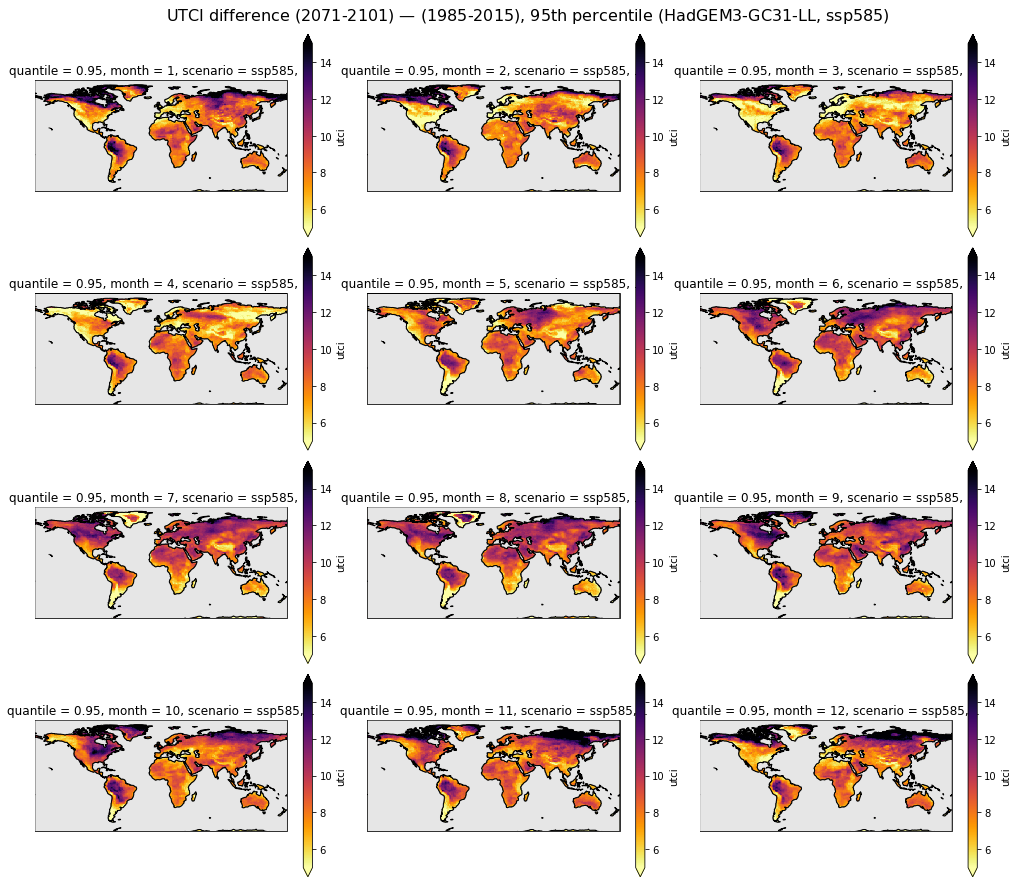

In [8]:
model = "HadGEM3-GC31-LL"
scenario = "ssp585"

title = f"UTCI difference ({scenario_date_range[0]}-{scenario_date_range[1]}) $\emdash$ ({ref_date_range[0]}-{ref_date_range[1]}), 95th percentile ({model}, {scenario})"
outputname = output_path / f"UTCI_climatology_p95_difference_1985-2015_2071-2101_{model}_{scenario}.png"

plot_diff_maps_monthly(hadgem_ssp585, title=title, vmin=5, vmax=15, cmap_diverging=False, outputname=outputname)

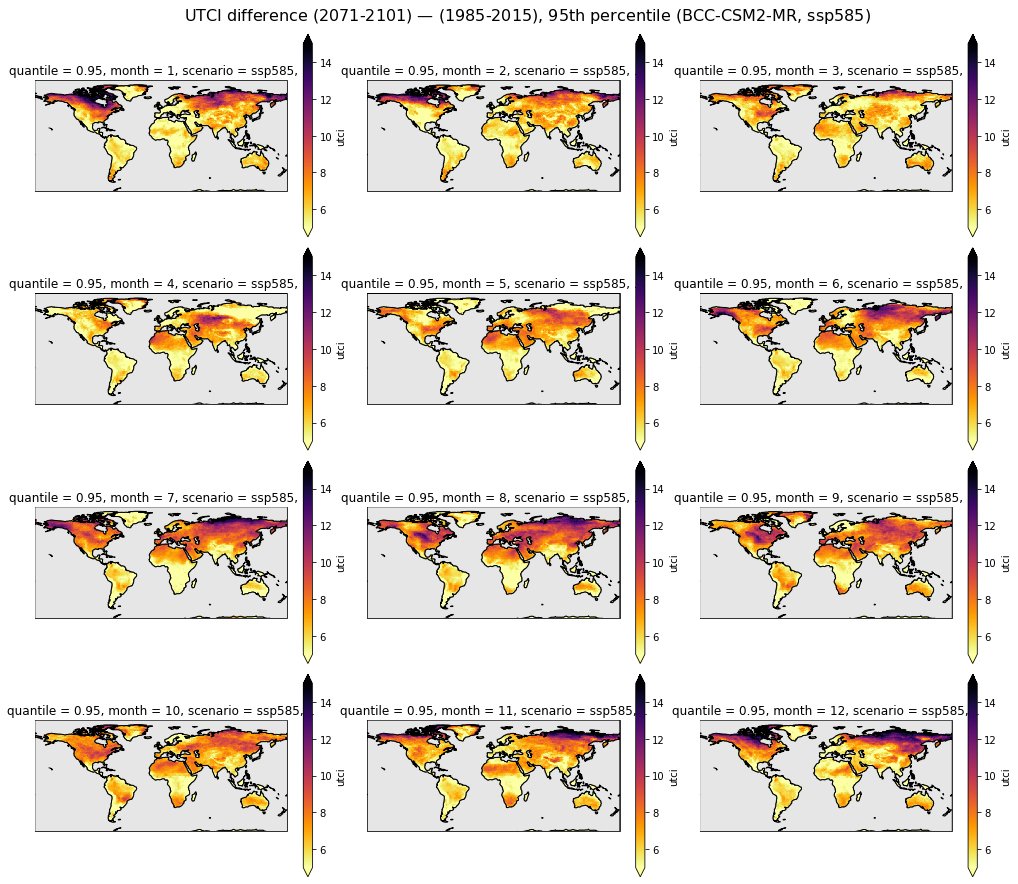

In [9]:
model = "BCC-CSM2-MR"
scenario = "ssp585"

title = f"UTCI difference ({scenario_date_range[0]}-{scenario_date_range[1]}) $\emdash$ ({ref_date_range[0]}-{ref_date_range[1]}), 95th percentile ({model}, {scenario})"
outputname = output_path / f"UTCI_climatology_p95_difference_1985-2015_2071-2101_{model}_{scenario}.png"

plot_diff_maps_monthly(bcc_ssp585, title=title, vmin=5, vmax=15, cmap_diverging=False, outputname=outputname)